In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
plt.rcParams["figure.figsize"] = (18,8)

 Q1. Show that for $\large \displaystyle{\lim_{\sigma \to 0} \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\pi)^2}{2 {\sigma}^2}} = \delta(x-\pi)} $ :  $$\int \cos x\delta(x-\pi) dx = -1$$

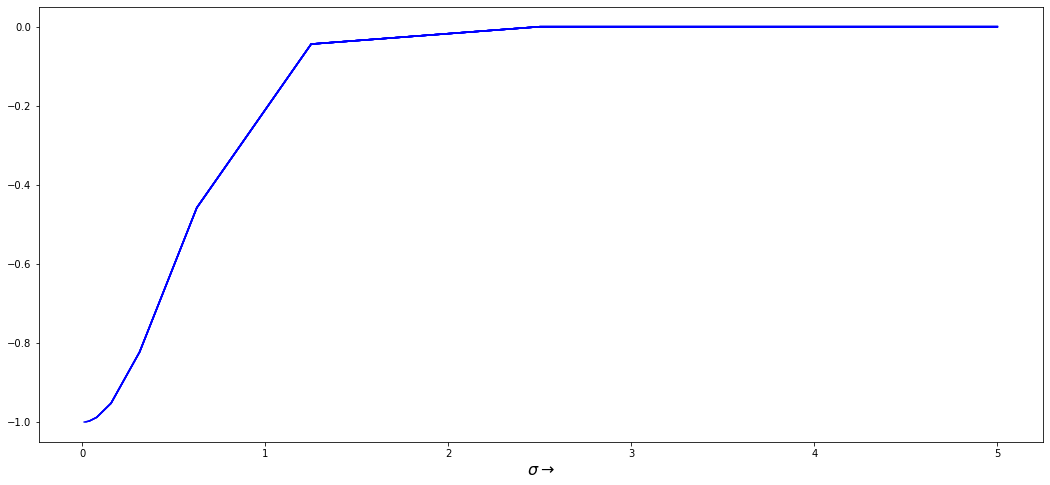

In [2]:
sigma=10
E,s=[],[]

def f(x):
    return np.cos(x)*(1/(sigma*(2*np.pi)**0.5))*np.exp(-(x-np.pi)**2/(2*(sigma)**2))

for i in range(10):
    a=si.quad(lambda x:f(x),np.pi-5*(sigma),np.pi+5*(sigma),limit=200)[0]
    sigma=sigma*0.5
    E.append(a)
    s.append(sigma)
    plt.plot(s,E,'b-')
    plt.xlabel(r'$ \sigma \rightarrow $',fontsize=16)
plt.show()

 Q2. Show that $\large\displaystyle{\lim_{\epsilon \to 0} \frac{1}{\pi}(\frac{\epsilon}{x^2 + \epsilon^2}) = \delta(x)} $ by applying it on two functions of $x$.

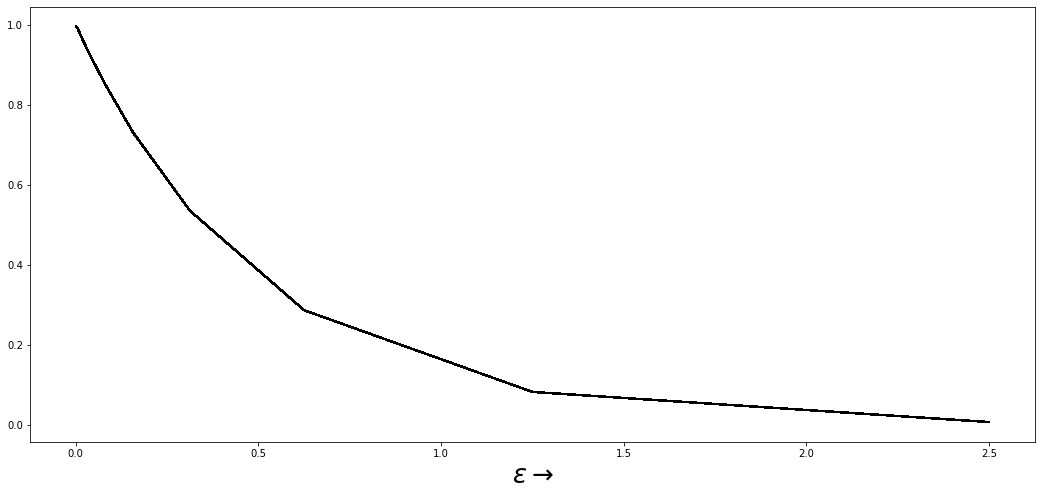

In [3]:
E=5
A,s = [],[]

def f(x):
    return np.cos(x)*(1/np.pi)*(E/(x**2+E**2))

for i in range(500):
    a=si.quad(lambda x:f(x),-150*E,150*E,limit=500)[0]
    E=E*0.5
    A.append(a)
    s.append(E)
    plt.plot(s,A,'k-')
    plt.xlabel(r'$ \epsilon \rightarrow $',fontsize=26)
plt.show()

 Q3. Plot the following function in the domain $(-4\pi \le x \le 4\pi) :$ $ \\ $ $$\large f(x)=\tan^{-1}x \textrm{  for  } 0\le x <2\pi \textrm{  and  } f(x+2\pi)=f(x)$$ $\\ $
     Reconstruct this function with its **Fourier Components**.

In [4]:
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt
from pylab import *

q1=[(-5*np.pi),(-4*np.pi),(-3*np.pi),(-2*np.pi),(-np.pi),
    0,np.pi,(2*np.pi),(3*np.pi),(4*np.pi),(5*np.pi)]

q2=[r'${-5\pi}$',r'${-4\pi}$',r'${-3\pi}$',r'${-2\pi}$',r'${-\pi}$',
    r'$0$',r'${\pi}$',r'${2\pi}$',r'${3\pi}$',r'${4\pi}$',r'${5\pi}$']

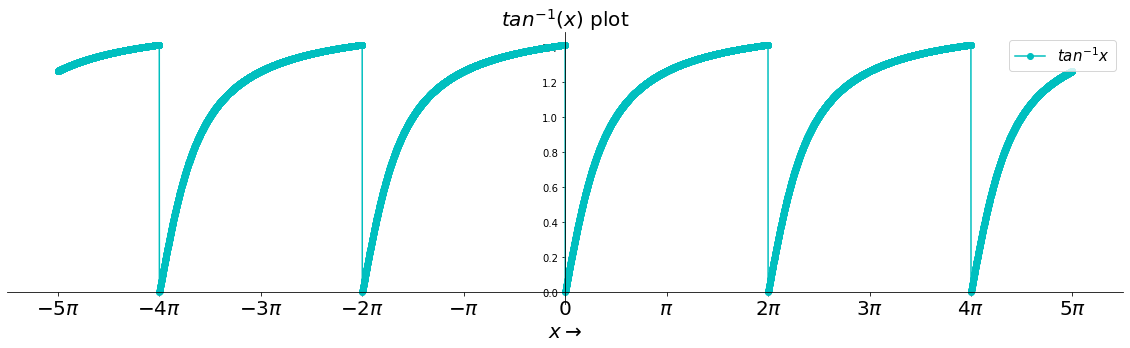

In [5]:
def f(X):
    return np.arctan(X%(2*np.pi))

x=np.linspace(-5*np.pi,5*np.pi,10001)
y=f(x)

fig = plt.figure(figsize=(20,5))
a = fig.add_subplot(111)
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.plot(x,y,'co-')
ax.legend(['$tan^{-1} x$'],fontsize=15)
xlim(1.1*x.min(), 1.1*x.max())
xticks(q1,q2, fontsize=20)
xlabel(r'$ x \rightarrow $', fontsize=20)
plt.title(r'$tan^{-1}(x) $ plot',fontsize=20)
plt.show()

## For a function of fourier
## $$ \displaystyle{f(x) = \frac{a_o}{2} + \sum_{n=1}^\infty a_n \cos nx + \sum_{n=1}^\infty b_n \sin nx }$$
## where,
## $ \displaystyle{\qquad a_o = \frac{1}{2\pi} \int_{0}^{2\pi} f(x) \text{ d}x }$

## $ \displaystyle{\qquad a_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x) \cos nx \text{ d}x }$

## $ \displaystyle{\qquad b_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x) \sin nx \text{ d}x \text{ for n = 1,2,3,4.....}}$

In [6]:
def ff(f,x,maxn):
    Ao=(1/(2*np.pi))*si.quad(lambda x:f(x),0,2*np.pi,limit=200)[0]
    A,B=[0],[0]

    for n in range(1,maxn):
        An=1/(np.pi)*si.quad(lambda x:np.cos(n*x)*f(x),0,2*np.pi,limit=200)[0]
        A.append(An)
        Bn=1/(np.pi)*si.quad(lambda x:np.sin(n*x)*f(x),0,2*np.pi,limit=200)[0]
        B.append(Bn)    
    
    for n in range(maxn):
        Ao=Ao+A[n]*np.cos(n*x)+B[n]*np.sin(n*x)
    return Ao

In [7]:
def fft_plot(ff,x,y,maxn):
    for n in maxn:
        Y = ff(f,x,n)
        fig = plt.figure(figsize=(20,6))
        a = fig.add_subplot(111)
        ax = gca()
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('data',0))
        ax.yaxis.set_ticks_position('left')
        ax.spines['left'].set_position(('data',0))    
        ax.plot(x,y,'co-',x,Y,'k-.')
        xlim(1.1*x.min(), 1.1*x.max())
        xticks(q1,q2, fontsize=20)
        xlabel(r'$ x \rightarrow $', fontsize=20)
        ax.legend(['$tan^{-1} x$','fourier'],fontsize=15)
        plt.title(r'Fourier components of $tan^{-1} x $  plot for $%0.f$ itterations'%(n),fontsize=20)
    plt.show()
    return ax

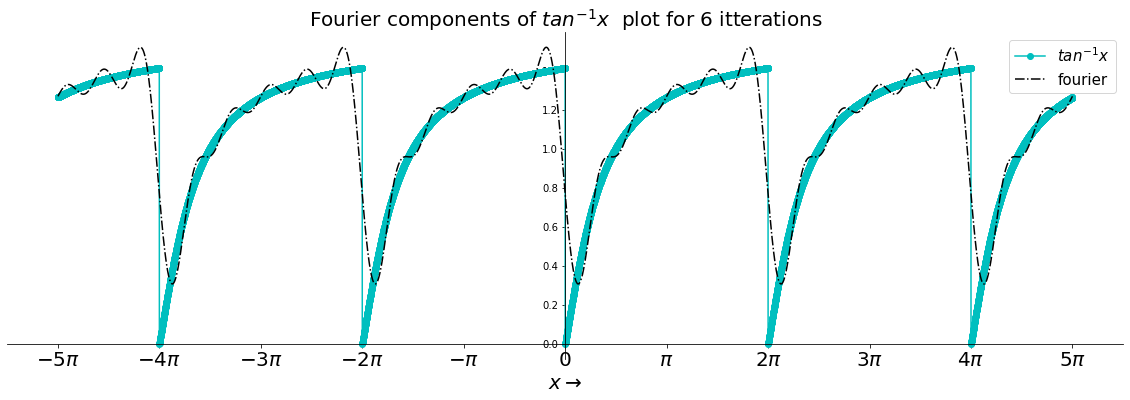

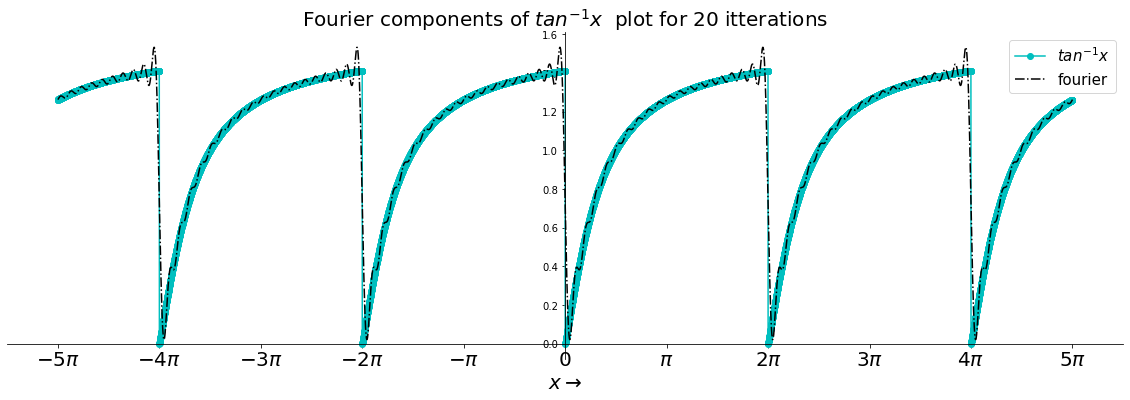

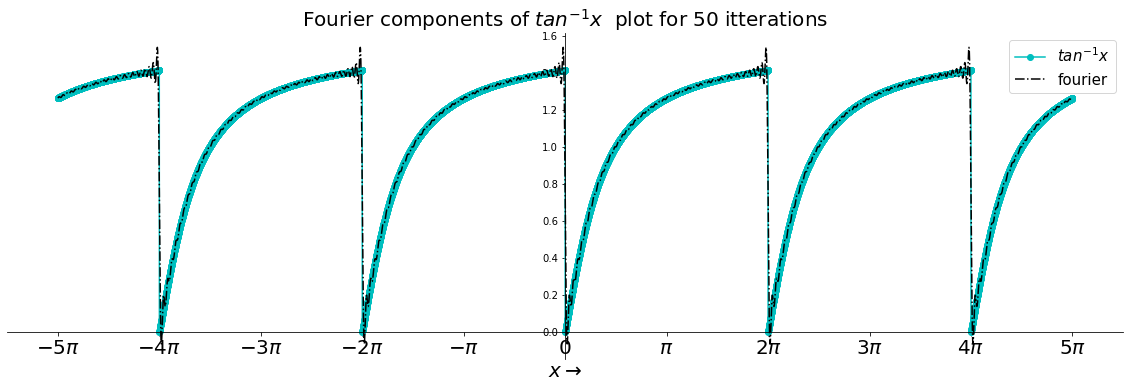

In [8]:
maxn=[6,20,50]
fft_plot(ff,x,y,maxn)
show()

$\text{Comments : We see on increasing the no. of intervals the fourier plot matches the graph plot ,} $

$\qquad \qquad \text{ but we observe that there's a flux gathered at the top-right-end of the plot wihich is the Gaussian flux.}$

Q4. Plot the Fourier integral of the function:
$$ f(x)=x\exp{(-\frac{x^2}{2\sigma^2})}$$

Plot the imaginary part as a function of $k$ for three values of $\sigma$.

Show that as increases the momentum uncertainty decreases. Also show that the real parts are zero in all cases.

In [9]:
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
from scipy.integrate import quad

Real part norm for sigma_{0} is : 0.0
Real part norm for sigma_{1} is : 0.0
Real part norm for sigma_{2} is : 0.0


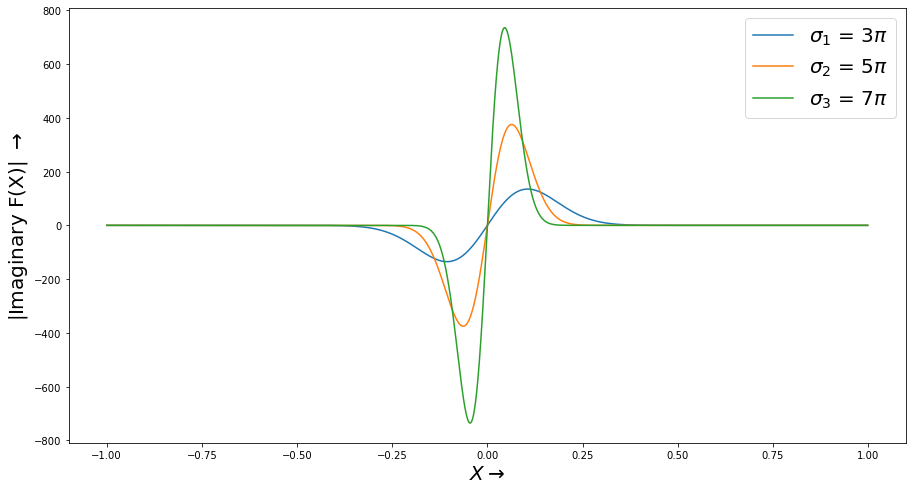

In [10]:
def f(x,k,s):
    return x*np.exp(-(x**2/(2*s**2)))*np.cos(k*x)

def g(x,k,s):
    return x*np.exp(-(x**2/(2*s**2)))*np.sin(k*x)

k=np.arange(-1,1,0.001)
sigma=[3*np.pi,5*np.pi,7*np.pi]

Real=[[quad(f,-np.inf,np.inf,limit=1000,args=(i,j))[0] for i in k] for j in sigma]
Imag=[[quad(g,-np.inf,np.inf,limit=1000,args=(i,j))[0] for i in k] for j in sigma] 
plt.figure(figsize=(15,8))    
for i in range(len(sigma)):
    print(r'Real part norm for sigma_{%i} is :'%(i),norm(Real[i]))
    plt.plot(k,Imag[i],label='$\sigma_{%i}$ = %i$\pi$'%(i+1,sigma[i]/np.pi))
    plt.xlabel(r"$X \rightarrow$",fontsize=20)
    plt.ylabel(r"|Imaginary F(X)| $\rightarrow$",fontsize=20)
    plt.legend(fontsize=20)
plt.show()

Q5. Calculate the Fourier integral of the following functions and the then plot the power spectrum, $ | \textrm{Fourier Transformation}|^2$ as a function of frequency :

a) $f(x)=\left\{\begin{array}{rl}\sin x & \textrm{ for } 0\le x\le a,\\ 0 & \textrm{ elsewhere } \end{array} \right.$
             (Repeat the problem for a= 1, 3, 5). Put comments about your observations on the effect of increasing $a$.
             
b) $f(x)=\sin x +\sin 2x$   

c) $f(x)=\left\{\begin{array}{rl}\sin x & \textrm{ for } x<0,\\ \sin 2x & \textrm{ for } x \ge 0 \end{array} \right. \qquad$
     (Comment on the differences between the power spectrum of case (b) and (c)

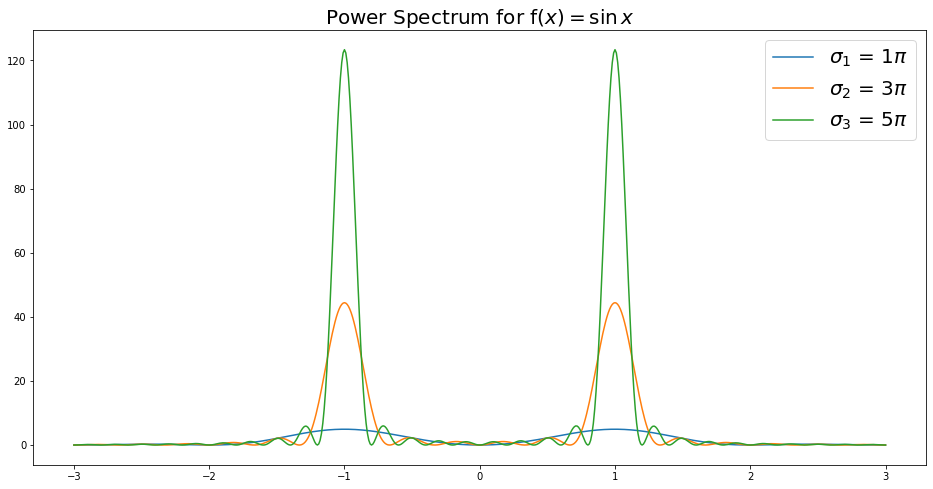

In [11]:
def f1_sin(x,t):
    return np.sin(x)*np.sin(x*t)

def f1_cos(x,t):
    return np.cos(x)*np.cos(x*t)

sigma=np.pi*np.array([1,3,5])
T=np.linspace(-3,3,601)
yr1=[[quad(f1_cos,0,i,args=(t),limit=500)[0] for t in T] for i in sigma]
yi1=[[quad(f1_sin,0,i,args=(t),limit=500)[0] for t in T] for i in sigma]
y1=[[yr1[i][t]**2 + yi1[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]
plt.figure(figsize=(16,8))
for i in range(len(sigma)):
    plt.plot(T,y1[i], label='$\sigma_{%i}$ = %i$\pi$'%(i+1,sigma[i]/np.pi))
plt.legend(fontsize=20)
plt.title(r'Power Spectrum for f$(x)=\sin x$',fontsize=20) 
plt.show()

$\text{Comments : The peak in the power spectrum increases with each amplitude increase.}$

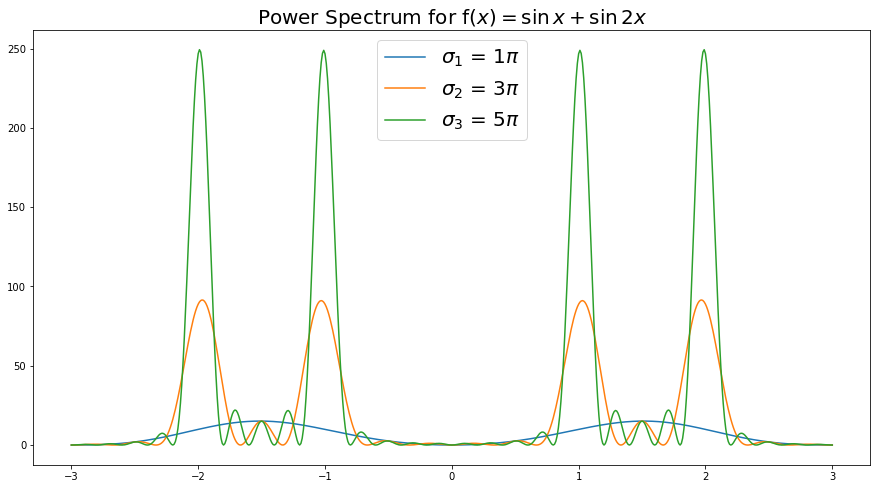

In [12]:
def f2_sin(x,t):
    return (np.sin(x) + np.sin(2*x))*np.sin(x*t)

def f2_cos(x,t):
    return (np.sin(x) + np.sin(2*x))*np.cos(x*t)

sigma=np.pi*np.array([1., 3., 5.])
T=np.linspace(-3,3,601)
yr2=[[quad(f2_cos,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma] 
yi2=[[quad(f2_sin,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma]
y2=[[yr2[i][t]**2 + yi2[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]
plt.figure(figsize=(15,8))
for i in range(len(sigma)):
    plt.plot(T,y2[i],label='$\sigma_{%i}$ = %i$\pi$'%(i+1,sigma[i]/np.pi))
plt.legend(fontsize=20)
plt.title(r'Power Spectrum for f$(x)=\sin x + \sin 2x$',fontsize=20) 
plt.show()

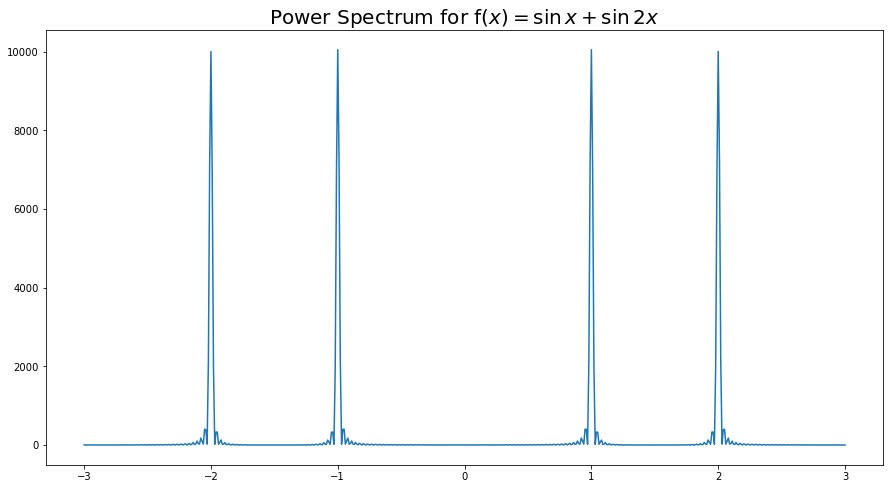

In [13]:
def f2_sin(x,t):
    return (np.sin(x) + np.sin(2*x))*np.sin(x*t)

def f2_cos(x,t):
    return (np.sin(x) + np.sin(2*x))*np.cos(x*t)

N=100
T=np.linspace(-3,3,601)
yr2=[quad(f2_cos,-N,N,args=(t),limit=500)[0] for t in T] 
yi2=[quad(f2_sin,-N,N,args=(t),limit=500)[0] for t in T] 
y2=[yr2[t]**2 + yi2[t]**2 for t in range(len(T))] 
plt.figure(figsize=(15,8))
plt.plot(T,y2)
plt.title(r'Power Spectrum for f$(x)=\sin x + \sin 2x$',fontsize=20) 
plt.show()

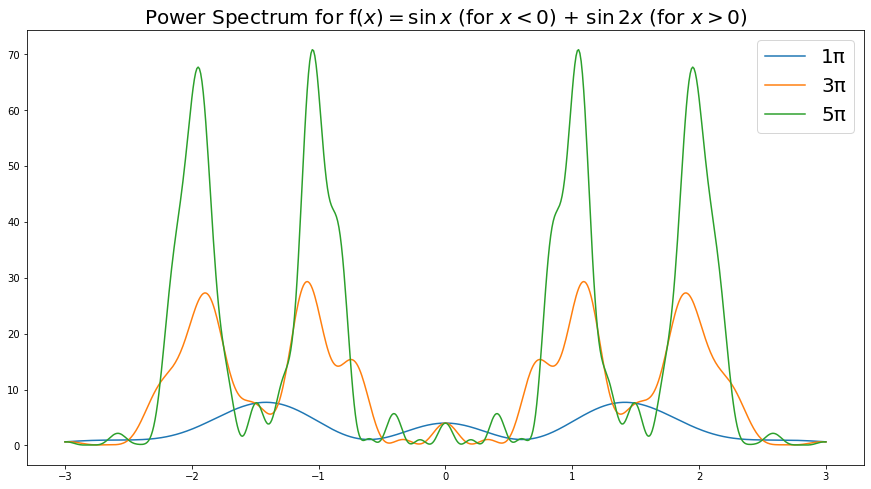

In [14]:
def f3_sin(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.sin(x*t)

def f3_cos(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.cos(x*t)

sigma=np.pi*np.array([1., 3., 5.])
T=np.linspace(-3,3,601)
yr3=[[quad(f3_cos,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma] 
yi3=[[quad(f3_sin,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma]
y3=[[yr3[i][t]**2 + yi3[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]
plt.figure(figsize=(15,8))
for i in range(len(sigma)):
    plt.plot(T,y3[i],label='%dπ'%(sigma[i]/np.pi))
plt.legend(fontsize=20)
plt.title(r'Power Spectrum for f$(x)=\sin x$ (for $x<0$) + $\sin 2x$ (for $x>0$)',fontsize=20)
plt.show()

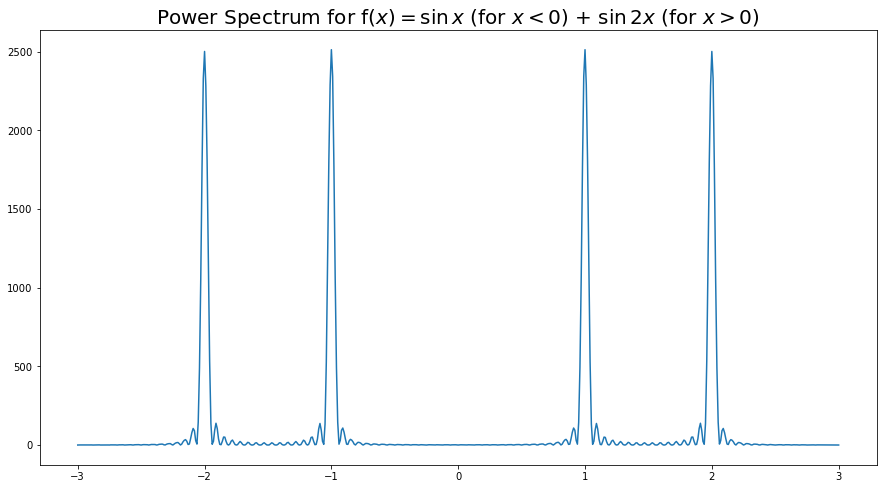

In [15]:
def f3_sin(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.sin(x*t)

def f3_cos(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.cos(x*t)

N=100
T=np.linspace(-3,3,601)
yr3=[quad(f3_cos,-N,N,args=(t),limit=500)[0] for t in T] 
yi3=[quad(f3_sin,-N,N,args=(t),limit=500)[0] for t in T] 
y3=[yr3[t]**2 + yi3[t]**2 for t in range(len(T))] 
plt.figure(figsize=(15,8))
plt.plot(T,y3)
plt.title(r'Power Spectrum for f$(x)=\sin x$ (for $x<0$) + $\sin 2x$ (for $x>0$)',fontsize=20)

plt.show()

$\text{Comments : (c) has more higher diffracted order than (b), whereas (b) has more higher peaks than (c)}$